In [84]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset (assuming you have your dataset in a CSV file)
# Replace 'your_dataset.csv' with the actual file path.
data = pd.read_csv('nnv_org.csv')  # Assuming tab-separated data

# Display the first few rows of the dataset to inspect the attributes
data.head()


,id,project code,pq #,po / so #,asn/dn #,country,managed by,fulfill via,vendor inco term,shipment mode,...,unit of measure (per pack),line item quantity,line item value,pack price,unit price,manufacturing site,first line designation,weight (kilograms),freight cost (usd),line item insurance (usd)
0,1,100-CI-T01,Pre-PQ Process,SCMS-4,ASN-8,Côte d'Ivoire,PMO - US,Direct Drop,EXW,Air,...,30,19,551.0,29.00,0.97,Ranbaxy Fine Chemicals LTD,True,13,780.34,0.0
1,3,108-VN-T01,Pre-PQ Process,SCMS-13,ASN-85,Vietnam,PMO - US,Direct Drop,EXW,Air,...,240,1000,6200.0,6.20,0.03,"Aurobindo Unit III, India",True,358,4521.5,0.0
2,4,100-CI-T01,Pre-PQ Process,SCMS-20,ASN-14,Côte d'Ivoire,PMO - US,Direct Drop,FCA,Air,...,100,500,40000.0,80.00,0.80,ABBVIE GmbH & Co.KG Wiesbaden,True,171,1653.78,0.0
3,15,108-VN-T01,Pre-PQ Process,SCMS-78,ASN-50,Vietnam,PMO - US,Direct Drop,EXW,Air,...,60,31920,127360.8,3.99,0.07,"Ranbaxy, Paonta Shahib, India",True,1855,16007.06,0.0
4,16,108-VN-T01,Pre-PQ Process,SCMS-81,ASN-55,Vietnam,PMO - US,Direct Drop,EXW,Air,...,60,38000,121600.0,3.20,0.05,"Aurobindo Unit III, India",True,7590,45450.08,0.0


In [73]:
# Select attributes for outlier detection
attributes_for_outlier_detection = [
    'unit price',
    'line item quantity',
    'line item value',
    'weight (kilograms)',
    'freight cost (usd)',
    'line item insurance (usd)'
]

# Extract the selected attributes
numerical_data = data[attributes_for_outlier_detection]

# Display the first few rows of the selected attributes
numerical_data.head()


,unit price,line item quantity,line item value,weight (kilograms),freight cost (usd),line item insurance (usd)
0,0.97,19,551.0,13,780.34,0.0
1,0.03,1000,6200.0,358,4521.5,0.0
2,0.80,500,40000.0,171,1653.78,0.0
3,0.07,31920,127360.8,1855,16007.06,0.0
4,0.05,38000,121600.0,7590,45450.08,0.0


In [74]:

numerical_data = data.select_dtypes(include=np.number).apply(pd.to_numeric, errors='coerce')

# Drop rows with NaN values (you can adjust this step based on your data and analysis requirements)
numerical_data.dropna(inplace=True)

# Choose the number of isolation trees and contamination rate
n_estimators = 100  # You can adjust this based on your dataset.
contamination = 0.05  # Adjust as needed.

# Train the Isolation Forest model
model = IsolationForest(n_estimators=n_estimators, contamination=contamination, random_state=42)
model.fit(numerical_data)

# Predict outliers
predictions = model.predict(numerical_data)


In [75]:
# Identify Outliers
outliers = data[predictions == -1]

# Display the identified outliers
outliers


,id,project code,pq #,po / so #,asn/dn #,country,managed by,fulfill via,vendor inco term,shipment mode,...,unit of measure (per pack),line item quantity,line item value,pack price,unit price,manufacturing site,first line designation,weight (kilograms),freight cost (usd),line item insurance (usd)
26,134,100-HT-T01,Pre-PQ Process,SCMS-10130,ASN-616,Haiti,PMO - US,Direct Drop,EXW,Air,...,100,25,8750.00,350.00,3.50,"Pacific Biotech, Thailand",True,60,3097.85,14.00
60,543,106-HT-T01,Pre-PQ Process,SCMS-23840,ASN-2504,Haiti,PMO - US,Direct Drop,EXW,Air,...,100,28,9800.00,350.00,3.50,"Pacific Biotech, Thailand",True,109,782.13,15.68
75,796,102-BW-T01,Pre-PQ Process,SCMS-31370,ASN-2796,Botswana,PMO - US,Direct Drop,EXW,Air,...,2,15,450.00,30.00,15.00,"Trinity Biotech, Plc",True,1,578.01,0.88
84,858,109-TZ-T01,Pre-PQ Process,SCMS-34680,ASN-3332,Tanzania,PMO - US,Direct Drop,CIP,Air,...,30,50000,2520000.00,50.40,1.68,"MSD, Haarlem, NL",True,4093,9339,4939.20
111,1095,144-BW-T01,Pre-PQ Process,SCMS-41870,ASN-4896,Botswana,PMO - US,Direct Drop,EXW,Air,...,100,20,7000.00,350.00,3.50,"Pacific Biotech, Thailand",True,48,1172.11,13.72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10303,86800,111-MZ-T30,FPQ-15195,SO-50141,DN-4231,Mozambique,PMO - US,From RDC,N/A - From RDC,Truck,...,30,200000,1920000.00,9.60,0.32,Hetero Unit III Hyderabad IN,True,26603,19194.37,2259.84
10305,86802,111-MZ-T30,FPQ-15195,SO-50130,DN-4235,Mozambique,PMO - US,From RDC,N/A - From RDC,Truck,...,60,300000,2316000.00,7.72,0.13,Hetero Unit III Hyderabad IN,True,39688,28277.42,2725.93
10315,86814,151-NG-T30,FPQ-14989,SO-51424,DN-4276,Nigeria,PMO - US,From RDC,N/A - From RDC,Air Charter,...,120,70000,1304800.00,18.64,0.16,ABBVIE Ludwigshafen Germany,True,15198,26180,1341.33
10318,86817,103-ZW-T30,FPQ-15197,SO-50020,DN-4307,Zimbabwe,PMO - US,From RDC,N/A - From RDC,Truck,...,60,205243,738874.80,3.60,0.06,"Cipla, Goa, India",False,See DN-4307 (ID#:83920),See DN-4307 (ID#:83920),869.66


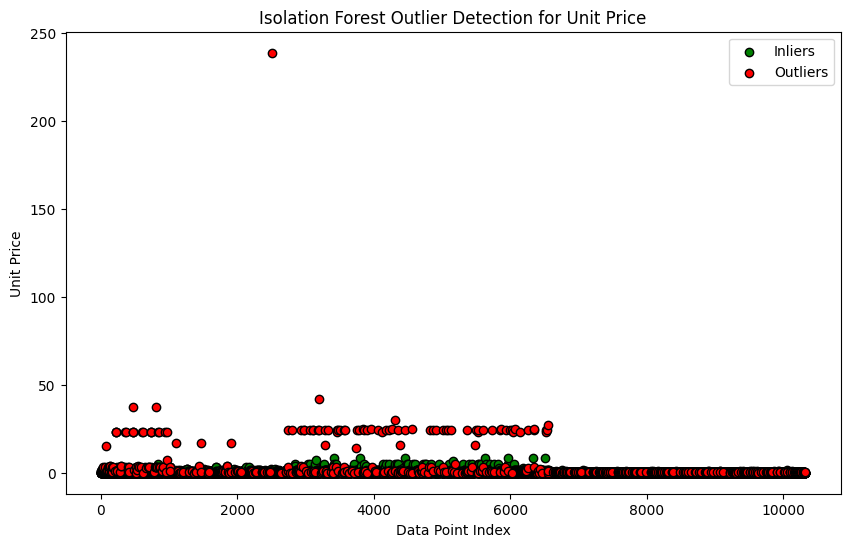

In [76]:
import matplotlib.pyplot as plt

# Separate inliers and outliers
inliers = numerical_data[predictions == 1]
outliers = numerical_data[predictions == -1]

# Visualize Outliers
plt.figure(figsize=(10, 6))

# Scatter plot for inliers
plt.scatter(inliers.index, inliers['unit price'], c='green', label='Inliers', marker='o', edgecolors='k')

# Scatter plot for outliers
plt.scatter(outliers.index, outliers['unit price'], c='red', label='Outliers', marker='o', edgecolors='k')

plt.title('Isolation Forest Outlier Detection for Unit Price')
plt.xlabel('Data Point Index')
plt.ylabel('Unit Price')

# Add a legend to explain the colors
plt.legend()

plt.show()

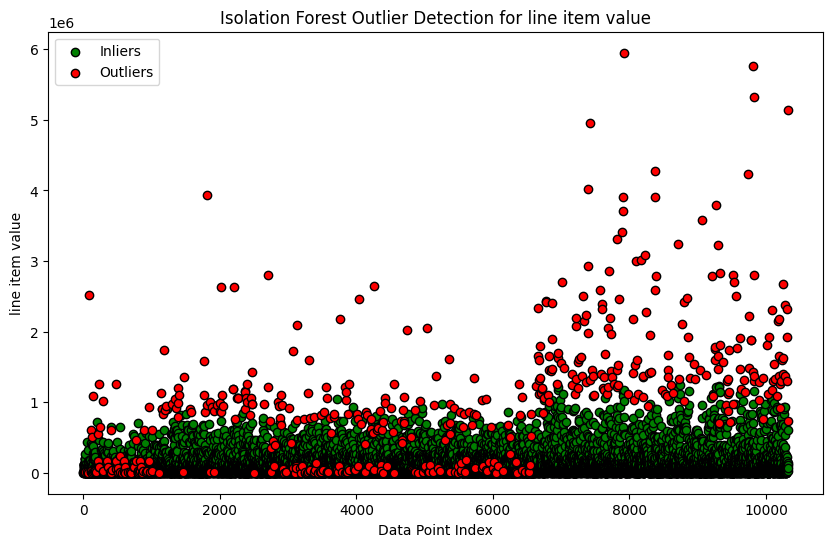

In [77]:
inliers = numerical_data[predictions == 1]
outliers = numerical_data[predictions == -1]

# Visualize Outliers
plt.figure(figsize=(10, 6))

# Scatter plot for inliers
plt.scatter(inliers.index, inliers['line item value'], c='green', label='Inliers', marker='o', edgecolors='k')

# Scatter plot for outliers
plt.scatter(outliers.index, outliers['line item value'], c='red', label='Outliers', marker='o', edgecolors='k')

plt.title('Isolation Forest Outlier Detection for line item value')
plt.xlabel('Data Point Index')
plt.ylabel('line item value')

# Add a legend to explain the colors
plt.legend()

plt.show()

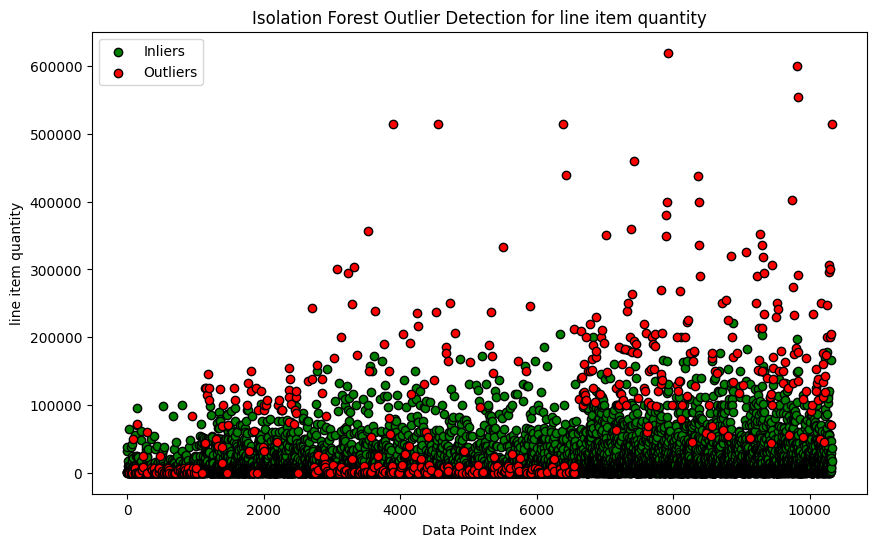

In [78]:
inliers = numerical_data[predictions == 1]
outliers = numerical_data[predictions == -1]

# Visualize Outliers
plt.figure(figsize=(10, 6))

# Scatter plot for inliers
plt.scatter(inliers.index, inliers['line item quantity'], c='green', label='Inliers', marker='o', edgecolors='k')

# Scatter plot for outliers
plt.scatter(outliers.index, outliers['line item quantity'], c='red', label='Outliers', marker='o', edgecolors='k')

plt.title('Isolation Forest Outlier Detection for line item quantity')
plt.xlabel('Data Point Index')
plt.ylabel('line item quantity')

# Add a legend to explain the colors
plt.legend()

plt.show()

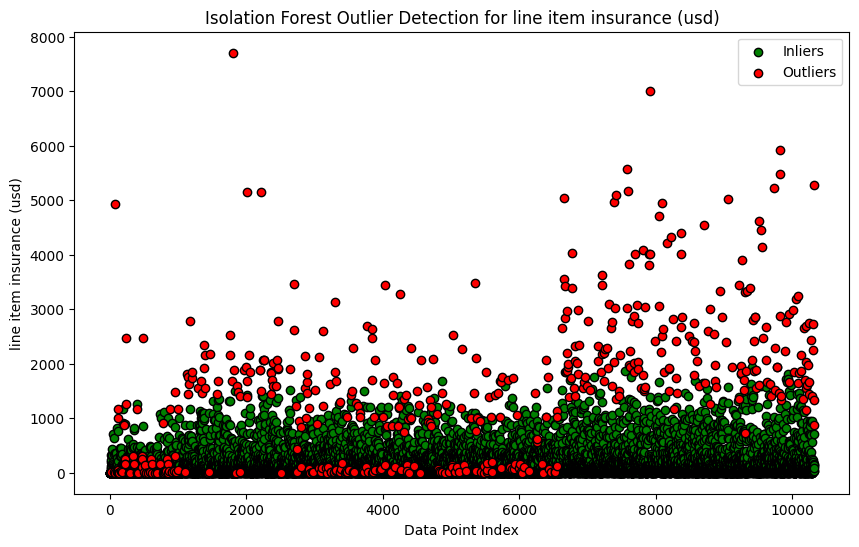

In [79]:
inliers = numerical_data[predictions == 1]
outliers = numerical_data[predictions == -1]

# Visualize Outliers
plt.figure(figsize=(10, 6))

# Scatter plot for inliers
plt.scatter(inliers.index, inliers['line item insurance (usd)'], c='green', label='Inliers', marker='o', edgecolors='k')

# Scatter plot for outliers
plt.scatter(outliers.index, outliers['line item insurance (usd)'], c='red', label='Outliers', marker='o', edgecolors='k')

plt.title('Isolation Forest Outlier Detection for line item insurance (usd)')
plt.xlabel('Data Point Index')
plt.ylabel('line item insurance (usd)')

# Add a legend to explain the colors
plt.legend()

plt.show()


<Axes: xlabel='unit price'>

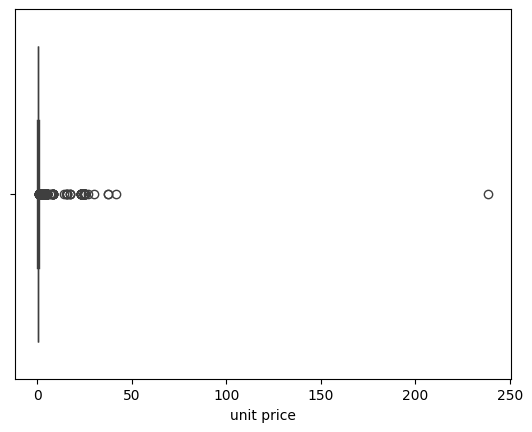

In [80]:
import seaborn as sns
sns.boxplot(x=data['unit price'])

<Axes: xlabel='line item value'>

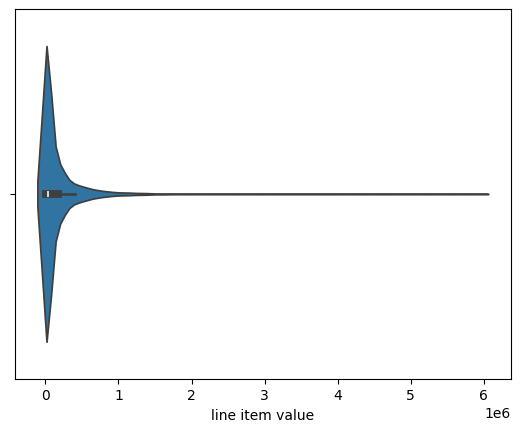

In [81]:
sns.violinplot(x=data['line item value'])

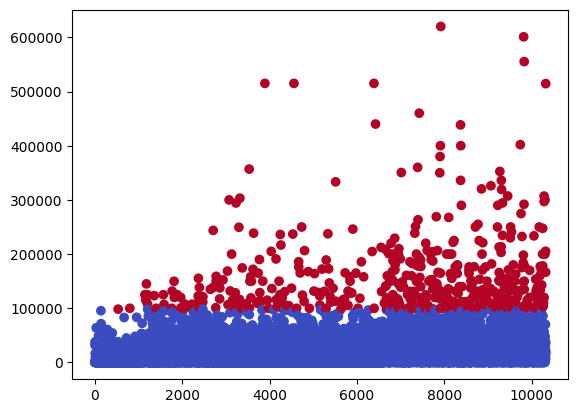

In [82]:
from scipy.stats import zscore
z_scores = zscore(data['line item quantity'])
plt.scatter(data.index, data['line item quantity'], c=np.abs(z_scores) > 2, cmap='coolwarm')

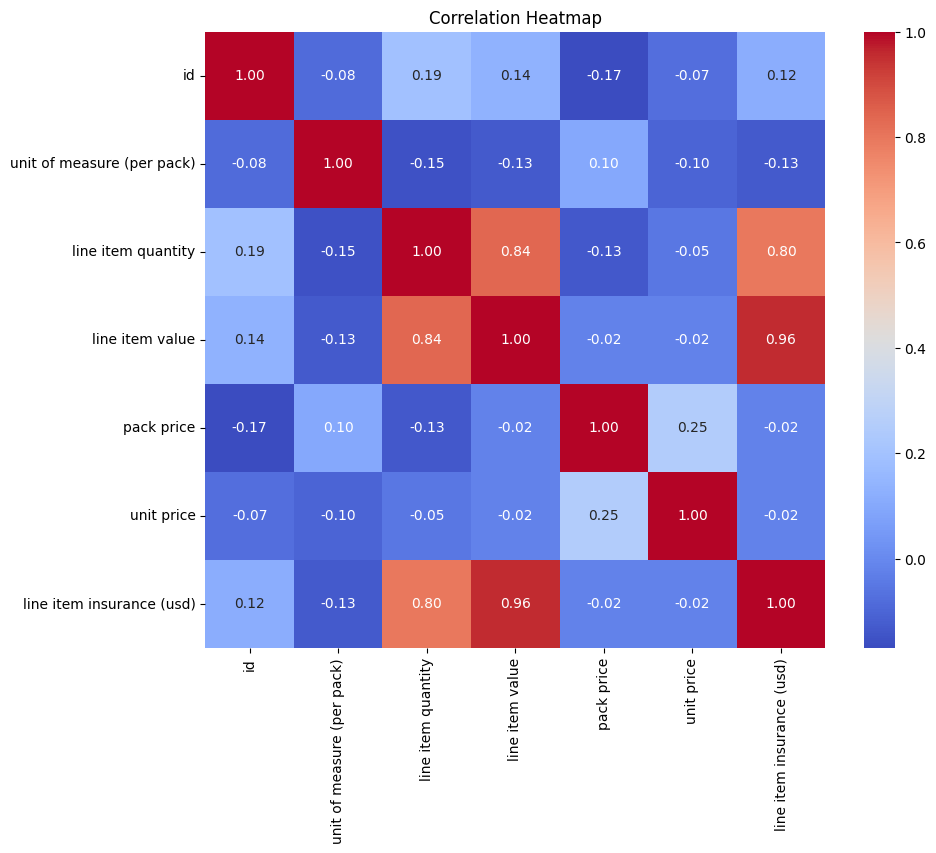

In [83]:
# Select only the numeric columns for correlation analysis
numeric_data = data.select_dtypes(include=[int, float])

# Compute the correlation matrix
correlation_matrix = numeric_data.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

plt.title('Correlation Heatmap')
plt.show()